In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from datetime import datetime
import shap

In [12]:
exec(open("../../header.py").read())

# Import data

In [13]:
folder = 'interactions'
X = pd.read_csv(processed_root(f'{folder}/X.csv'))
y = pd.read_csv(processed_root(f'{folder}/y.csv'))['y']

# Fit model

In [14]:
# fit RF
model = RandomForestRegressor(n_estimators = 100)
model.fit(X, y)

RandomForestRegressor()

# Shapley object

In [26]:
shapley = SHAP_FI('tree')
native = Native_FI()
ice = ICE("continuous", frac_sample = 0.1, trace = False)
pfi = PFI_FI(y)
fi_metrics = [ice, shapley, native, pfi]

In [27]:
comparator = Comparator()

In [28]:
comparator.fit(X, model, fi_metrics)

PFI fits in 6.01 seconds


In [29]:
comparator.build_raw_table()

,Feature,ICE FI,ICE In-Dist FI,Shapley Value,Native Feature Importance,PFI
0,X1,5.370237,5.269688,0.000631,0.039616,0.073082
1,X2,33.144911,32.985487,0.020852,0.640332,1.862788
2,X3,6.073857,6.105143,-0.020972,0.320052,1.830908


In [30]:
comparator.build_normalized_table()

,Feature,ICE FI,ICE In-Dist FI,Shapley Value,Native Feature Importance,PFI
0,X1,12.043860,11.879284,1.485359,3.961627,1.940172
1,X2,74.334269,74.358094,49.116002,64.033153,49.453090
2,X3,13.621872,13.762622,49.398639,32.005220,48.606738


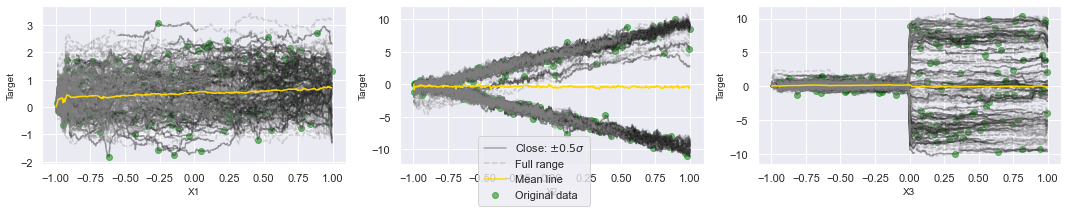

In [35]:
ice.ice_plot(mode = 'c-ice')

In [39]:
ice.ice_dfs['X2'].loc[lambda x:x.obs == 0].dydx_abs.mean()

46.66229216406148

In [38]:
ice.ice_dfs['X3'].loc[lambda x:x.obs == 0].dydx_abs.mean()

9.373139024063915